# Import packages

import useful packages for experiments

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook as tqdm

In [2]:
lines = open('grammar_data.txt').read().strip().split('\n')
pairs = [[s for s in l.split('\t')] for l in lines]

- depth

In [3]:
depths = []
for pair in tqdm(pairs):
    depth = []
    for i in pair[0].split('#'):
        depth.append(int(len(i)/2))
    depths.append(max(depth))

- number of iterations

In [4]:
iterations = []
for pair in tqdm(pairs):
    count = 1
    for i in pair[0].split(' '):
        if(i == '#'):
            count += 1
    iterations.append(1 if count == 0 else count)

- length

In [5]:
lengths = []
for pair in tqdm(pairs):
    length = 0
    for i in pair[1].split(' '):
        length += 1
    lengths.append(length)

- unmatching rate

In [6]:
labels = []
unmatching = 0
matching = 0
label_cp = []
for pair in tqdm(pairs):
    label = []
    for i in pair[1].split(' '):
        if i == "#":
            continue
        elif i == "0":
            label.append(0)
        else:
            label.append(1)
        label_cp.append(int(i))
    labels.append(sum(label))

for i in labels:
    if i == 0:
        matching += 1
    else:
        unmatching += 1

error = 0
for i in label_cp:
    if i != 0:
        error += 1

# Experimental results

- depth to frequency

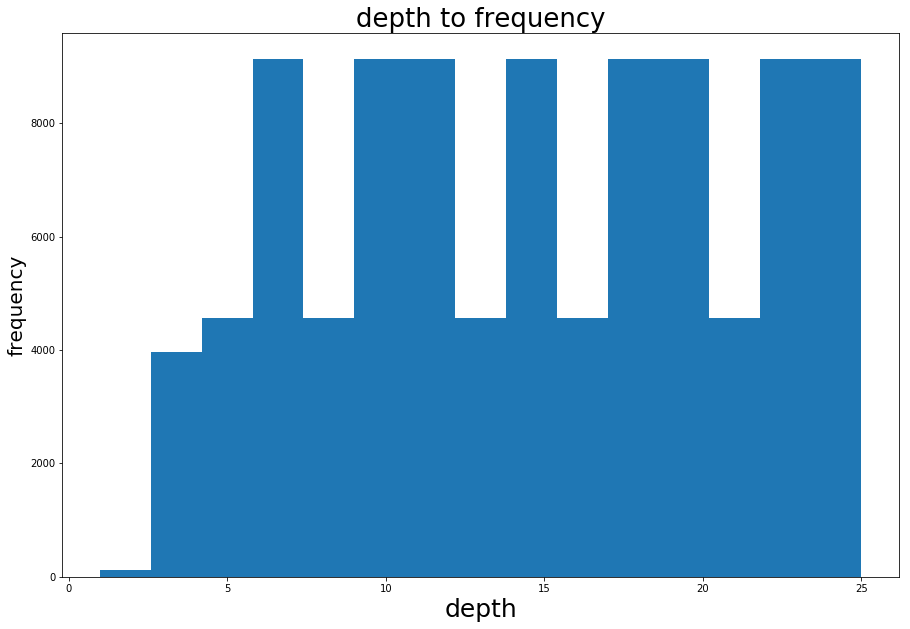

In [7]:
plt.figure(figsize=(15,10))
plt.hist(depths, bins=15)
plt.xlabel('depth', fontsize=25)
plt.ylabel('frequency', fontsize=20)
plt.title('depth to frequency', fontsize=26)
plt.savefig('depth_to_frequency.png')

- unmatching rate

In [8]:
print("data size: %d" % len(labels))
print("matching data: %0.2f" % (matching/len(labels)*100),"%")
print("unmatching data: %0.2f" % (unmatching/len(labels)*100),"%")
print("unmatching rate: %0.2f" % (error/len(label_cp)*100),"%")

data size: 100000
matching data: 9.83 %
unmatching data: 90.18 %
unmatching rate: 17.14 %


- number of iterations

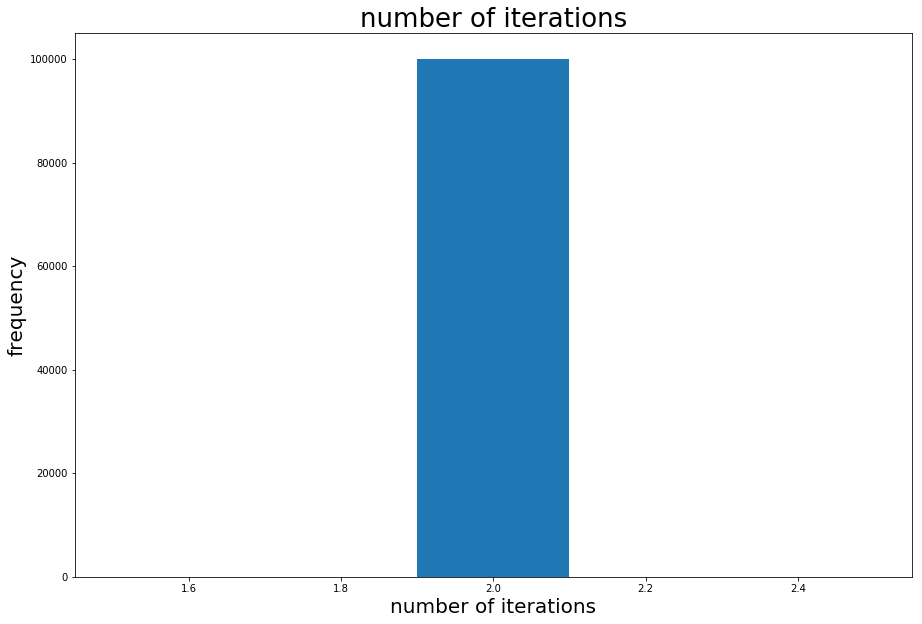

In [9]:
plt.figure(figsize=(15,10))
plt.hist(iterations, bins=5)
plt.xlabel('number of iterations', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.title('number of iterations', fontsize=26)
plt.savefig('number_of_iterations.png')

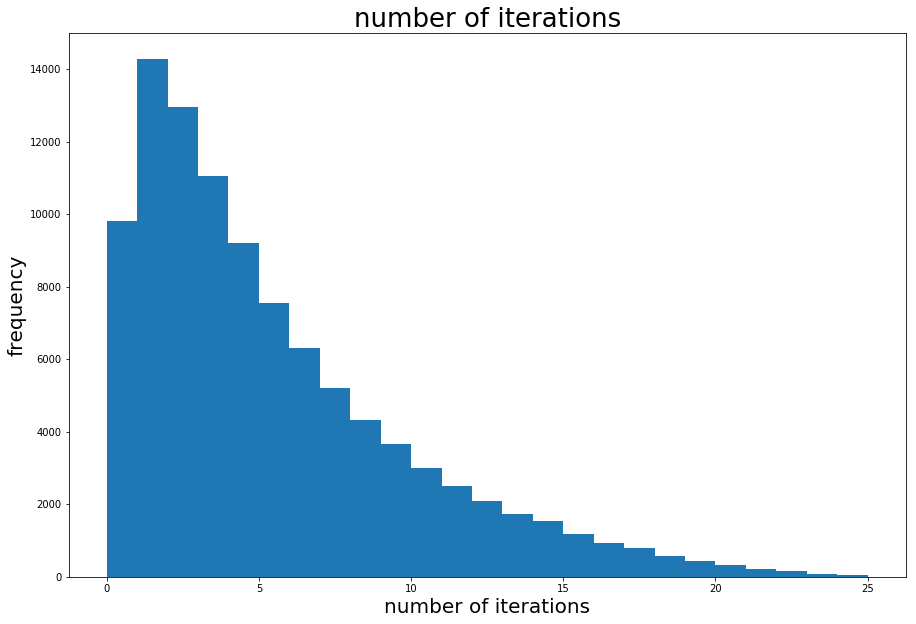

In [10]:
plt.figure(figsize=(15,10))
plt.hist(labels, bins=25)
plt.xlabel('number of iterations', fontsize=20)
plt.ylabel('frequency', fontsize=20)
plt.title('number of iterations', fontsize=26)
plt.savefig('number_of_errors.png')

- length to frequency

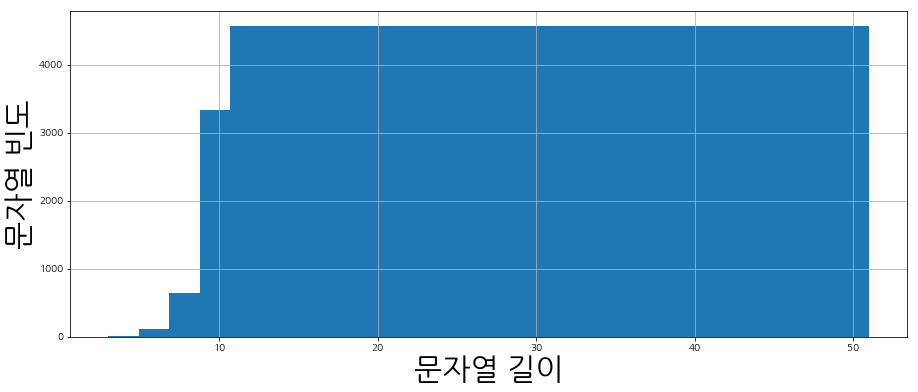

In [11]:
from matplotlib import rc, font_manager
rc('font', family='NanumGothic')

plt.figure(figsize=(15,6))
plt.hist(lengths, bins=25)
plt.xlabel('문자열 길이', fontsize=30)
plt.ylabel('문자열 빈도', fontsize=30)
plt.grid()
#plt.title('length to frequency', fontsize=26)
plt.savefig('length_to_frequency.png', format='png',bbox_inches='tight',dpi=300)